Friday Afternoon Workshop-03/16/23 TITANIC

Part 1

As you learned this week, there are many resources available to Python programmers, including these datasets from the Seaborn project. You can access and use these datasets like any dataframe with this seaborn function: dataframe=sns.load_dataset("mpg")

anagrams flights planets anscombe fmri seaice attention geyser taxiS brain_networks glue tips car_crashes healthexp titanic diamonds iris dots mpg dowjones penguins exercise

Part 2
Look through some of the datasets to understand the mix of discrete dimensions and continuous measures.

Choose a dataset to focus on. Set a question or two based on your expectations: Does the data change over time ? Are there multiple continuous measures? Are they correlated How do aggregated measures vary by group?

Part 3

Create several plots to see how the data is distributed (i.e, normal, skewed), what measures are correlated (pairplot, correlation matrix), behavior over time (if time is included), and categorical differences (pivot, bar charts, etc).

Choose 3-5 visualizations that help you tell a story. You can use Jupyter Lab to tell your story. Tell us which dataset you chose and why, what did you expect to find, and what you actually found.

We’ll convene 3:30 - 4:30 pm to discuss and share.

Room 1 Sol-Marie Quintero, Adam Shabana, Chad Crossman ,Victor Mantilla Colon, Marcus Madison

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [80]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [129]:
#titanic.info()
#titanic.columns
titanic.isnull().sum().sum()

869

In [28]:
#titanic_drop=titanic.drop(columns=['adult_male','alone'])
titanic_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 78.9+ KB


In [87]:
titanic_survivors=titanic_drop.query('survived== 1')
titanic_survivors

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive
1,1,1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,NaN,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,yes
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,NaN,Southampton,yes
9,1,2,female,14.0,1,0,30.0708,C,Second,child,NaN,Cherbourg,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,NaN,Cherbourg,yes
879,1,1,female,56.0,0,1,83.1583,C,First,woman,C,Cherbourg,yes
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,NaN,Southampton,yes
887,1,1,female,19.0,0,0,30.0000,S,First,woman,B,Southampton,yes


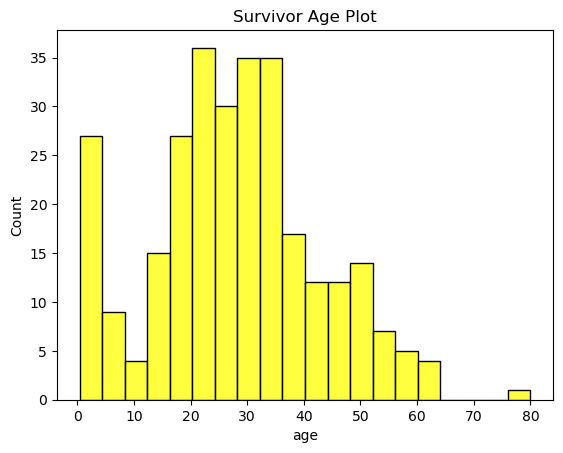

In [72]:
sns.histplot(titanic_survivors, x = 'age',bins = 20,color = 'yellow')
plt.title('Survivor Age Plot')
plt.show()


In [88]:
titanic_non_survivors=titanic_drop.query('survived== 0')
titanic_non_survivors

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,Third,man,NaN,Southampton,no
4,0,3,male,35.0,0,0,8.0500,S,Third,man,NaN,Southampton,no
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,NaN,Queenstown,no
6,0,1,male,54.0,0,0,51.8625,S,First,man,E,Southampton,no
7,0,3,male,2.0,3,1,21.0750,S,Third,child,NaN,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,NaN,Southampton,no
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,NaN,Queenstown,no
886,0,2,male,27.0,0,0,13.0000,S,Second,man,NaN,Southampton,no
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,NaN,Southampton,no


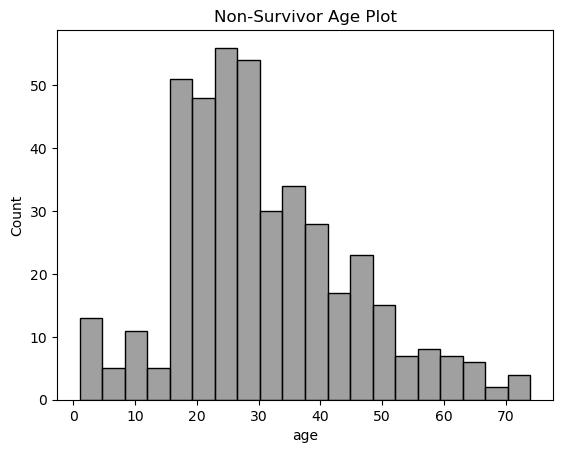

In [71]:
sns.histplot(titanic_non_survivors, x = 'age',bins = 20,color = 'grey')
plt.title('Non-Survivor Age Plot')
plt.show()

In [130]:
# How many passengers that traveled with loved ones versus those who traveled alone survived?
titanic['familytraveled'] = (titanic['sibsp'] + titanic['parch']) > 0
num_passengers = titanic.groupby('familytraveled')['pclass'].count()
num_passengers

familytraveled
False    537
True     354
Name: pclass, dtype: int64

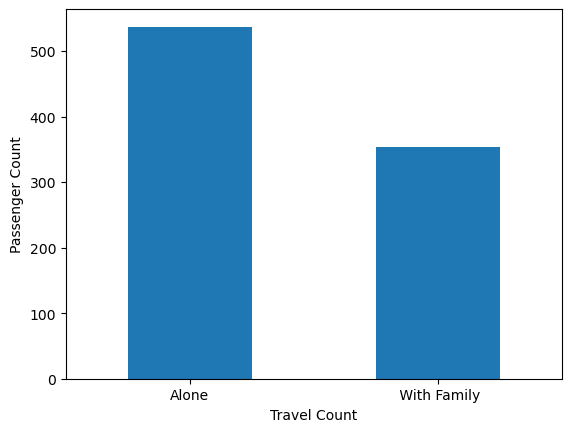

Text(0.5, 1.0, 'Bar Plot Showing passengers who traveled alone or with faimily')

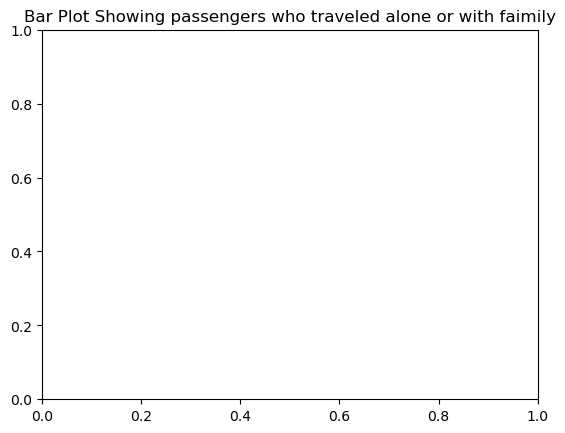

In [93]:
ax = num_passengers.plot(kind='bar')
ax.set_xlabel('Travel Count')
ax.set_ylabel('Passenger Count')
ax.set_xticklabels(['Alone', ' With Family'], rotation=0)
plt.show()
plt.title('Bar Plot Showing passengers who traveled alone or with faimily')

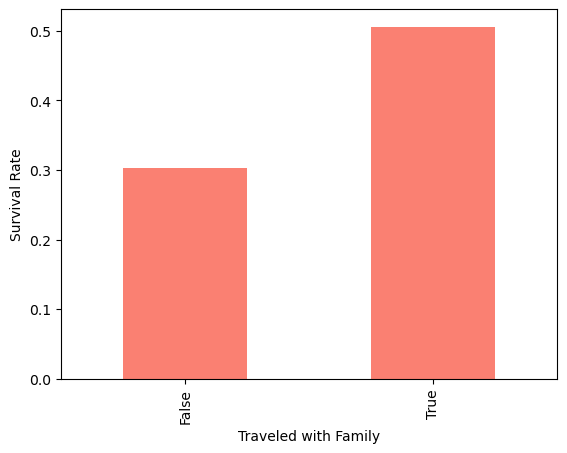

In [78]:
survived_df = titanic.groupby('familytraveled')['survived'].mean()
survived_df.plot.bar(x='familytraveled', y='survived', color='salmon')
plt.xlabel('Traveled with Family')
plt.ylabel('Survival Rate')
plt.show()

Text(0.5, 1.0, 'Swarm of Ships Manifest')

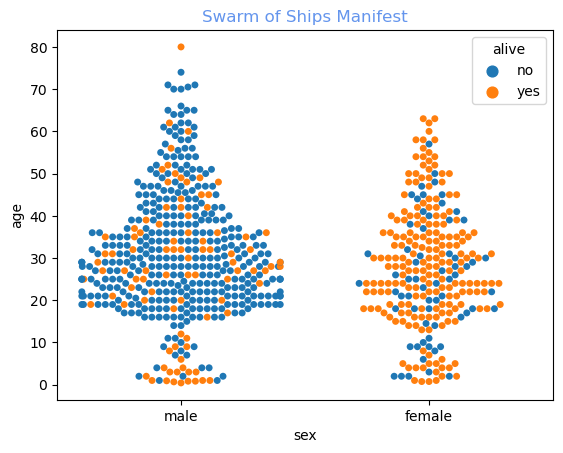

In [94]:
pivot_titanic = pd.pivot_table(titanic, index='alive', values='age', columns='sex', aggfunc='mean')
pivot_titanic
sns.swarmplot(data=titanic, x="sex",y="age",hue="alive")
plt.title('Swarm of Ships Manifest', color='cornflowerblue')

<AxesSubplot:xlabel='sex', ylabel='fare'>

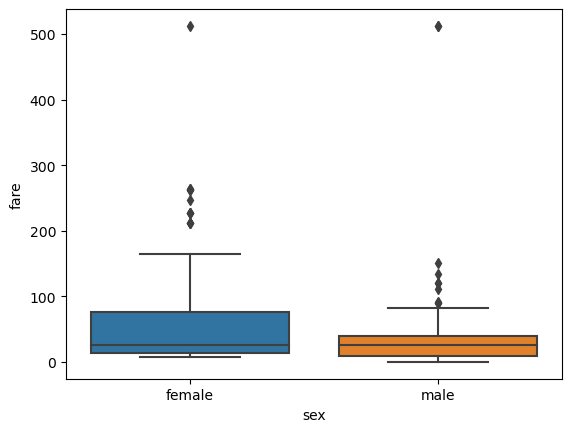

In [125]:
sns.boxplot(x='sex',y='fare',data=titanic_survivors)

<AxesSubplot:xlabel='sex', ylabel='fare'>

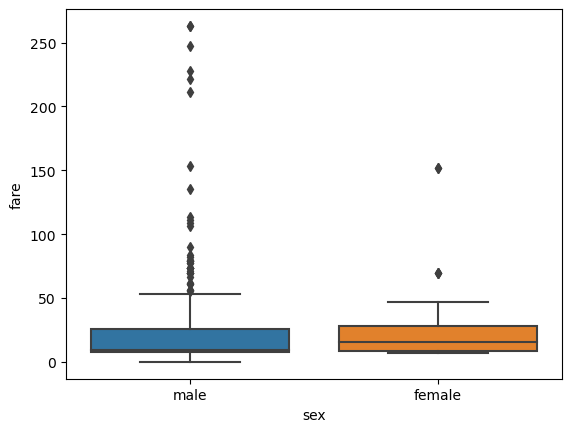

In [126]:
sns.boxplot(x='sex',y='fare',data=titanic_non_survivors)

In [100]:
expensive_fare=titanic[titanic['fare']>200]
expensive_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,familytraveled
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False,True
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True,False
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False,True
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False,True
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False,True
377,0,1,male,27.0,0,2,211.5000,C,First,man,True,C,Cherbourg,no,False,True
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,NaN,Cherbourg,yes,True,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False,True


In [132]:
titanic[titanic['fare']>300]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,familytraveled
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True,False


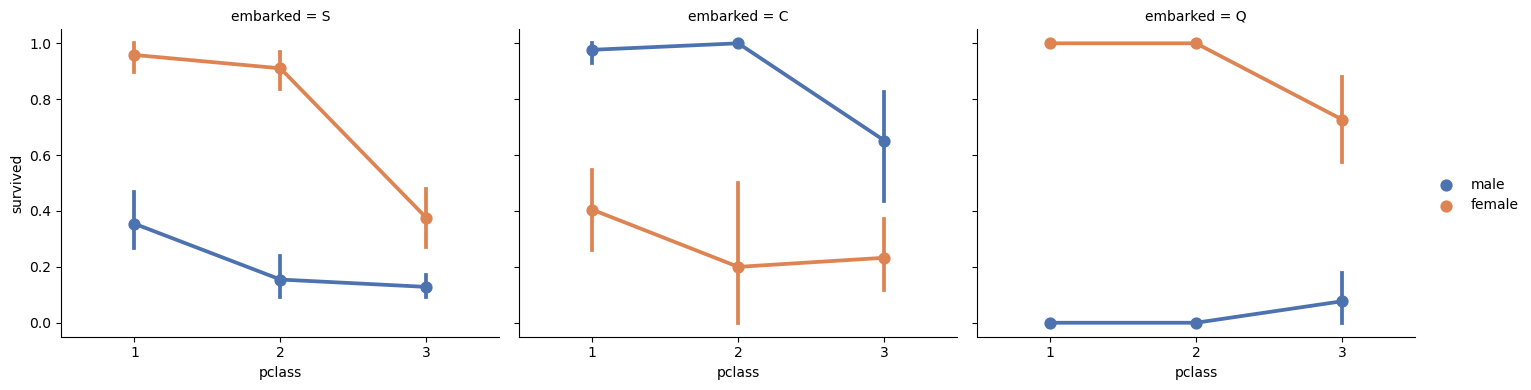

In [103]:
FacetGrid = sns.FacetGrid(titanic, col='embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

In [110]:
passenger_survivor_sex=titanic_survivors.groupby('sex').count()

In [116]:
passenger_survivor_sex_class=titanic_survivors.groupby(['sex','pclass'])
passenger_survivor_sex_class

In [68]:
passenger_survivor_sex_class_embark=titanic_survivors.groupby(['sex','pclass', 'embark_town']).count()
passenger_survivor_sex_class_embark

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass embark_town                                                       
female 1      Cherbourg          42   37     42     42    42        42     42   
              Queenstown          1    1      1      1     1         1      1   
              Southampton        46   42     46     46    46        46     46   
       2      Cherbourg           7    7      7      7     7         7      7   
              Queenstown          2    1      2      2     2         2      2   
              Southampton        61   60     61     61    61        61     61   
       3      Cherbourg          15   11     15     15    15        15     15   
              Queenstown         24    5     24     24    24        24     24   
              Southampton        33   31     33     33    33        33     33   
male   1      Cherbourg          17   16     17     17    17        17     17   
              Southampton        28   24     28     28    28        28     28   
       2      Cherbourg           2    1      2      2     2         2      2   
              Southampton        15   14     15     15    15        15     15   
       3      Cherbourg          10    7     10     10    10        10     10   
              Queenstown          3    1      3      3     3         3      3   
              Southampton        34   30     34     34    34        34     34   

                           who  deck  alive  
sex    pclass embark_town                    
female 1      Cherbourg     42    34     42  
              Queenstown     1     1      1  
              Southampton   46    41     46  
       2      Cherbourg      7     1      7  
              Queenstown     2     1      2  
              Southampton   61     7     61  
       3      Cherbourg     15     1     15  
              Queenstown    24     0     24  
              Southampton   33     3     33  
male   1      Cherbourg     17    16     17  
              Southampton   28    23     28  
       2      Cherbourg      2     0      2  
              Southampton   15     4     15  
       3      Cherbourg     10     0     10  
              Queenstown     3     0      3  
              Southampton   34     2     34

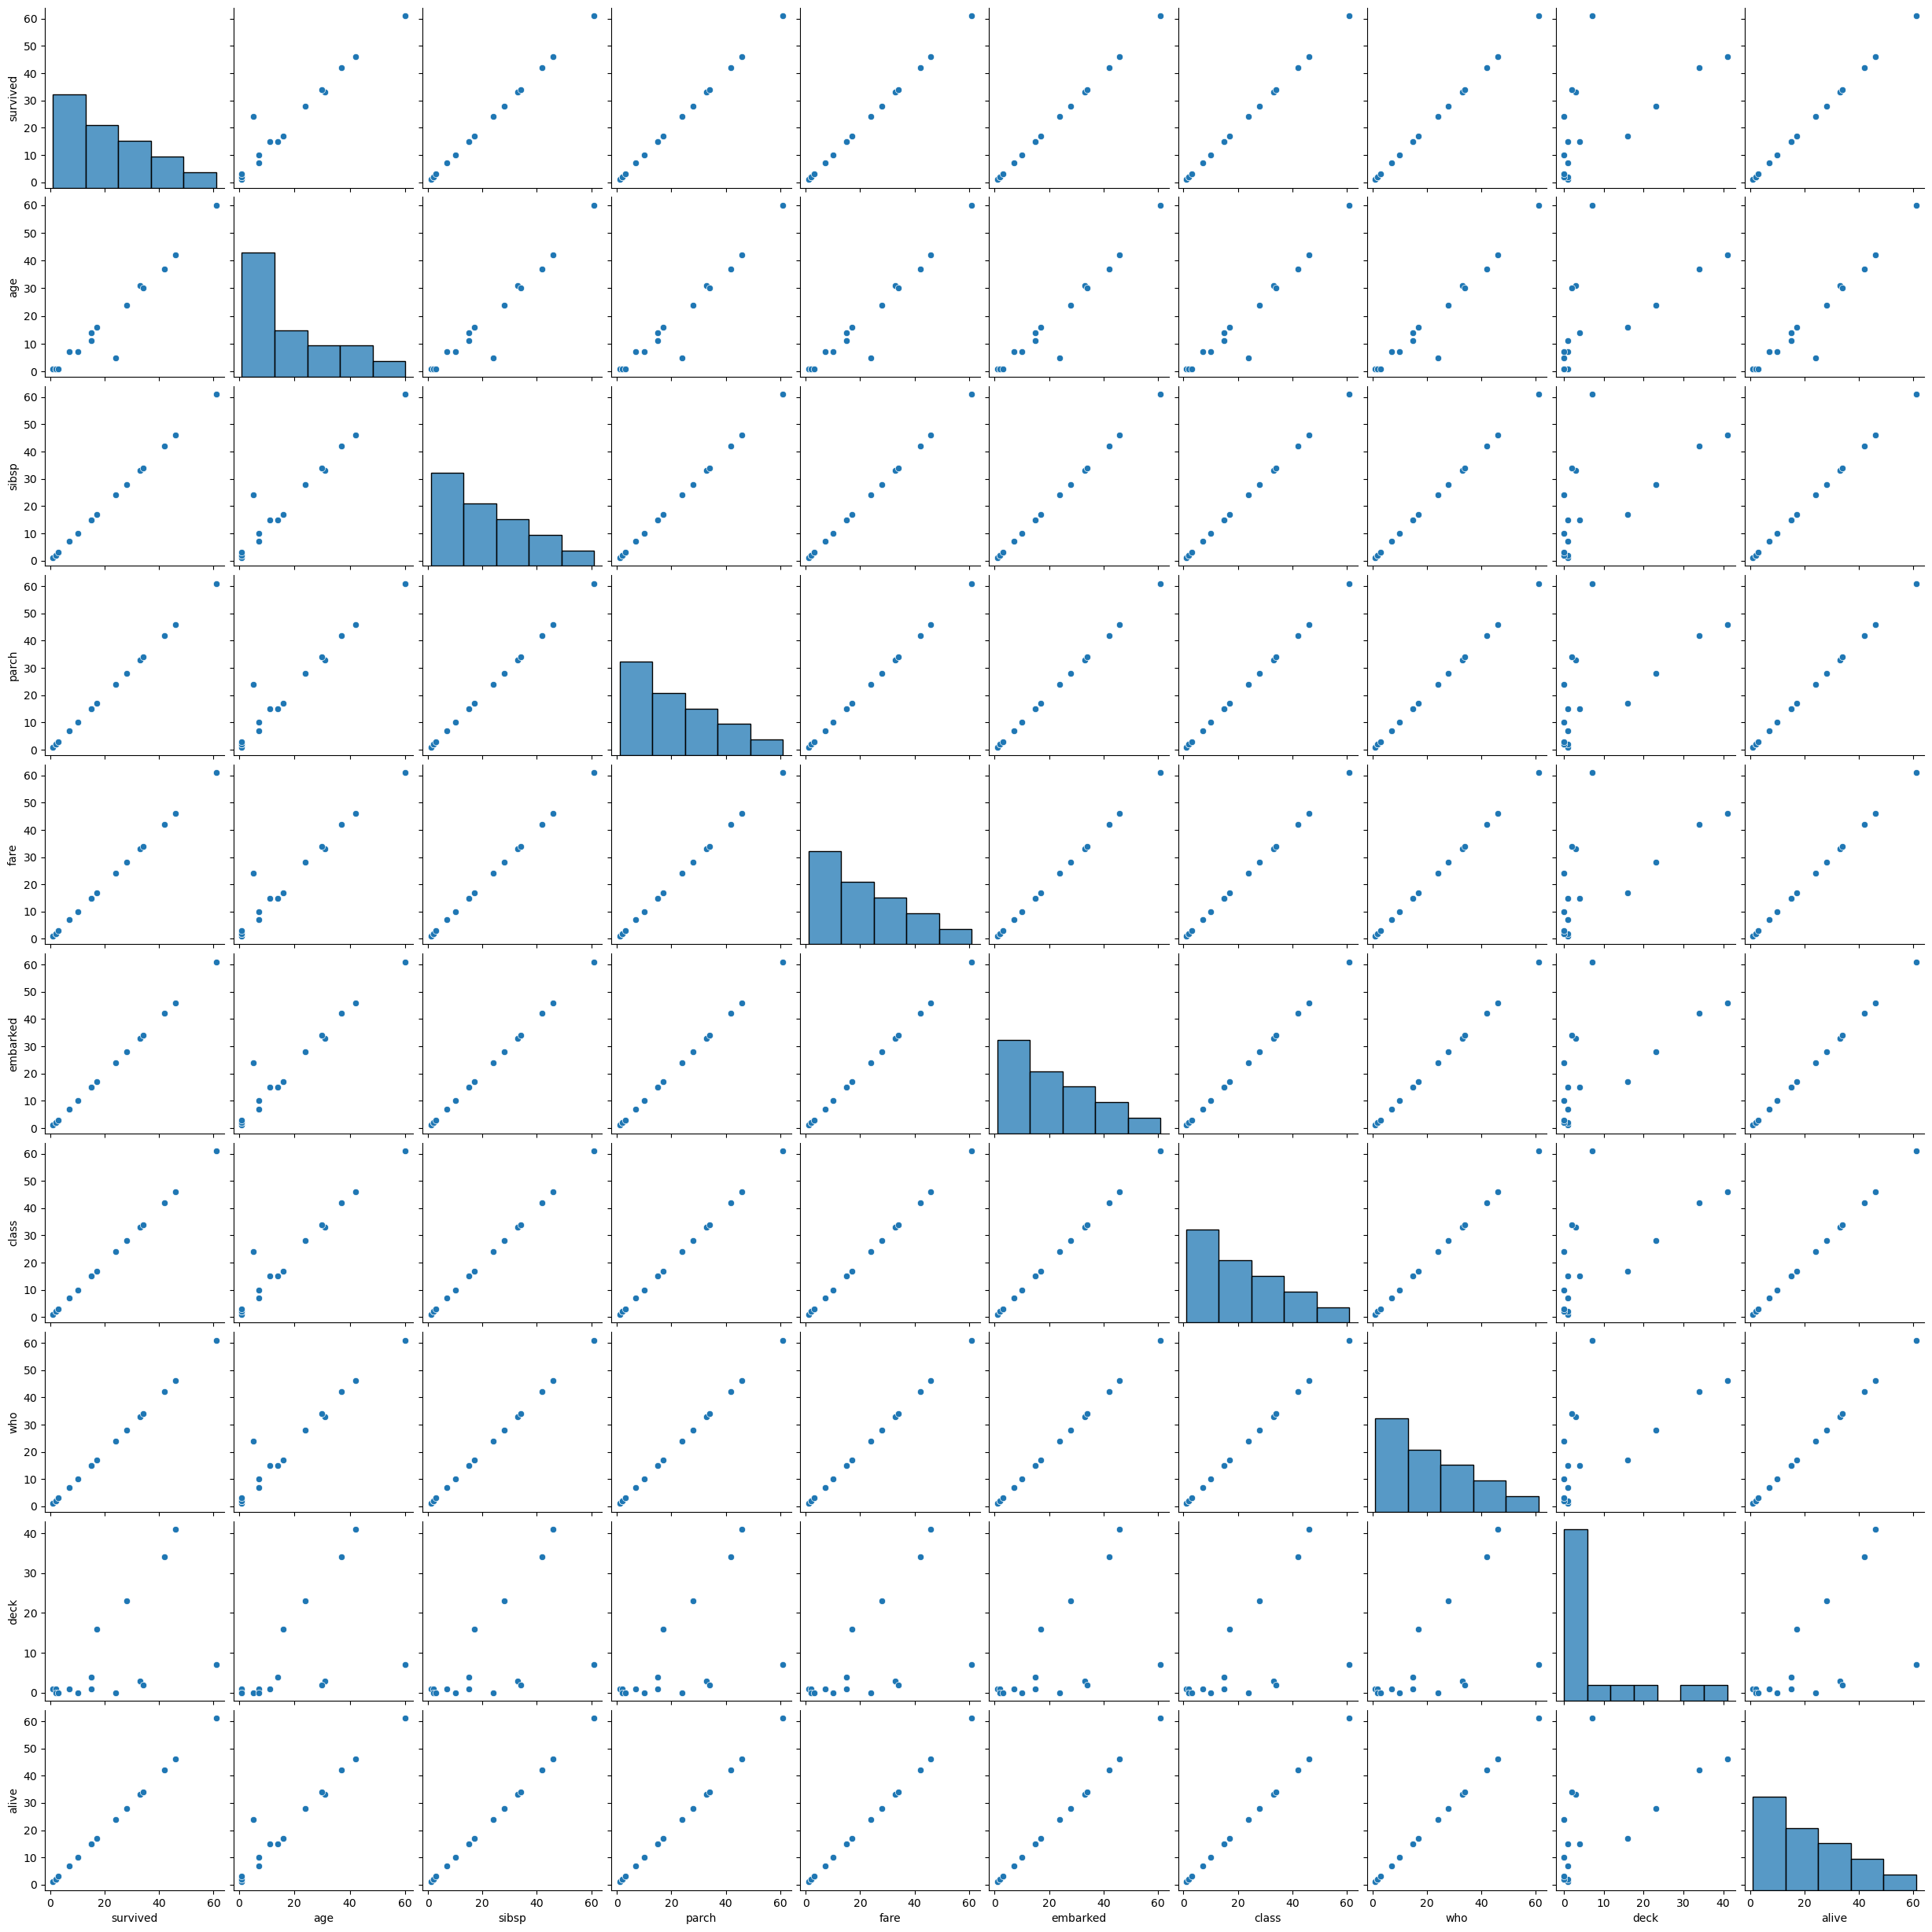

In [113]:
sns.pairplot(passenger_survivor_sex_class_embark)